In [1]:
import pandas as pd
import data_work 
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline




In [2]:
df = data_work.load_data()
df = data_work.clean_values(df)

summary = data_work.summary_calculations(df)

df_detail = data_work.detail_calculations(df)

df_time = df_detail.reset_index()
df_time['year'] = df_time['due_date'].dt.year
df_time['month'] = df_time['due_date'].dt.month

In [ ]:
df_time

In [ ]:
df_detail.tail()

In [ ]:
df_detail['customer_id'].plot()

In [ ]:
df_detail['amt_due'].plot()

In [ ]:
df_detail.loc[df_detail['deposit'], 'amt_due'].plot()

In [ ]:
df_detail.loc[(
    (df_detail['deposit'] == False) &
    (df_detail['contract_id'] == 974)
), 'amt_due'].plot()

In [ ]:
df_detail.loc[(
    (df_detail['deposit'] == False) &
    (df_detail['industry'] == 'Television Services')
), 'amt_due'].plot()

In [ ]:
df_detail.loc[(
    (df_detail['deposit'] == False) &
    (df_detail['industry'] == 'Major Banks')
), 'amt_due'].plot()

In [ ]:
df_detail.groupby('state').agg({'amt_due':'sum'}).plot.bar(y = 'amt_due', x= 'state')

In [ ]:
df_detail.groupby('state', as_index=False).agg({'amt_due':'sum'}).plot.bar(y = 'amt_due', x= 'state')

In [ ]:
df_detail.groupby('state', as_index=False).agg({'amt_due':'sum'}).sort_values('amt_due').plot.bar(y = 'amt_due', x= 'state')


# Amount due by Industry
Listed below are the top 5 industrys with amount due

<AxesSubplot:xlabel='industry'>

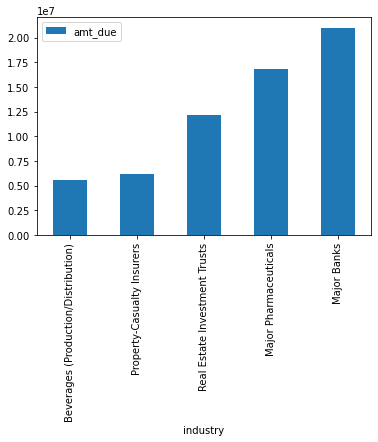

In [5]:
df_detail.groupby('industry', as_index=False).agg({'amt_due':'sum'}).sort_values('amt_due')[-5:].plot.bar(y = 'amt_due', x= 'industry')

# Amount Due by State

 Below shows the top 5 states that have the largest amounts due.  

In [ ]:
df_detail.groupby('state', as_index=False).agg({'amt_due':'sum'}).sort_values('amt_due')[-5:].plot.bar(y = 'amt_due', x= 'state')

In [ ]:
df_v = df_detail.reset_index()
df_v['year'] = df_v['due_date'].dt.year
df_v['month'] = df_v['due_date'].dt.month
df_v.head()

In [ ]:
df_v.groupby(['year', 'month']).agg({'amt_due':sum}).plot()

In [ ]:
df_v.groupby(['year', 'month']).agg({'amt_due':sum}).plot(figsize=(30, 15))

In [ ]:
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

df_v.groupby(['year', 'month']).agg({'amt_due':sum}).plot(figsize=(25, 10)).yaxis.set_major_formatter(tick)
plt.xticks(rotation=45)